In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("cleaned_final.csv")

In [2]:
pd.set_option('display.max_columns', None)
display(df.head())
df.shape

,PM10,SO2,CO,NO2,NOX,NO,O3,temp,feelslike,humidity,dew,windgust,windspeed,winddir,pressure,visibility,cloudcover,solarradiation,solarenergy,uvindex,hour,day,month,dayofweek,season,wind_dir_rad,wind_dir_sin,wind_dir_cos,weather_group_code,is_rainy,humidity_level,feelslike_diff,is_weekend,is_nighttime,is_rush_hour,humid_heat_index,uv_level
0,47.976,2.622,633.510,91.5125,123.564,44.600,4.0,10.0,10.0,87.38,8.0,16.6,9.4,250.0,1020.0,9.0,50.0,0.0,0.0,0.0,0,2,1,6,1,4.363323,-0.939693,-0.342020,0,0,2,0.0,1,1,0,873.80,0
1,50.498,2.786,537.026,90.1475,121.566,43.642,3.6,10.0,10.0,87.38,8.0,15.5,13.0,260.0,1021.0,10.0,50.0,0.0,0.0,0.0,1,2,1,6,1,4.537856,-0.984808,-0.173648,0,0,2,0.0,1,1,0,873.80,0
2,47.264,3.456,615.502,102.6875,119.832,39.820,3.4,10.0,10.0,87.38,8.0,15.8,13.0,260.0,1021.0,10.0,50.0,0.0,0.0,0.0,2,2,1,6,1,4.537856,-0.984808,-0.173648,0,0,2,0.0,1,1,0,873.80,0
3,46.026,3.260,693.612,82.3575,120.728,46.062,3.7,10.0,10.0,87.38,8.0,15.5,5.4,250.0,1021.0,10.0,50.0,0.0,0.0,0.0,3,2,1,6,1,4.363323,-0.939693,-0.342020,0,0,2,0.0,1,1,0,873.80,0
4,47.514,3.252,626.874,54.8325,97.116,41.600,4.0,9.0,9.0,93.45,8.0,14.4,0.0,0.0,1021.0,10.0,50.0,0.0,0.0,0.0,4,2,1,6,1,0.000000,0.000000,1.000000,0,0,2,0.0,1,1,0,841.05,0


(23782, 37)

In [ ]:
def evaluate_xgboost_no2(df, target='NO2'):
    from xgboost import XGBRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = XGBRegressor(random_state=42, verbosity=0)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" XGBoost (Default) - NO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [4]:
evaluate_xgboost_no2(df)

📌 XGBoost (Default) - NO2 Tahmini:
Train MAE: 6.48 | Test MAE: 9.56
Train RMSE: 8.81 | Test RMSE: 13.31
MAPE (Test): 21.25%
Median AE (Test): 6.75
Explained Variance Score: 0.7392
Train R² Score: 0.8864 | Test R² Score: 0.7392
Max Error: 89.84


In [ ]:
def evaluate_rf_no2(df, target='NO2'):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = RandomForestRegressor(random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" Random Forest (Default) - NO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [6]:
evaluate_rf_no2(df)

📌 Random Forest (Default) - NO2 Tahmini:
Train MAE: 3.91 | Test MAE: 10.35
Train RMSE: 5.52 | Test RMSE: 14.48
MAPE (Test): 23.44%
Median AE (Test): 7.22
Explained Variance Score: 0.6917
Train R² Score: 0.9554 | Test R² Score: 0.6914
Max Error: 76.89


In [ ]:
def evaluate_lgbm_no2(df, target='NO2'):
    from lightgbm import LGBMRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" LightGBM (Default) - NO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [9]:
evaluate_lgbm_no2(df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2876
[LightGBM] [Info] Number of data points in the train set: 19025, number of used features: 28
[LightGBM] [Info] Start training from score 51.634840
📌 LightGBM (Default) - NO2 Tahmini:
Train MAE: 9.64 | Test MAE: 10.82
Train RMSE: 12.89 | Test RMSE: 14.76
MAPE (Test): 24.47%
Median AE (Test): 7.93
Explained Variance Score: 0.6792
Train R² Score: 0.7571 | Test R² Score: 0.6792
Max Error: 75.78


e:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
def evaluate_catboost_no2(df, target='NO2'):
    from catboost import CatBoostRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = CatBoostRegressor(verbose=0, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" CatBoost (Default) - NO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [11]:
evaluate_catboost_no2(df)

📌 CatBoost (Default) - NO2 Tahmini:
Train MAE: 7.82 | Test MAE: 9.38
Train RMSE: 10.58 | Test RMSE: 13.05
MAPE (Test): 20.82%
Median AE (Test): 6.88
Explained Variance Score: 0.7495
Train R² Score: 0.8363 | Test R² Score: 0.7495
Max Error: 88.24


In [ ]:
#-----------------------------------------HIPERPARAMETRE AYARI-------------------------------------------------------------

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, explained_variance_score, max_error, r2_score
)
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_xgb_no2_manual(df, target='NO2'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )


    model = XGBRegressor(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.05,
        subsample=1,
        colsample_bytree=1,
        gamma=0,
        reg_alpha=0,
        reg_lambda=1,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" XGBoost (Optimize) - NO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [21]:
evaluate_xgb_no2_manual(df)

📌 XGBoost (Optimize) - NO2 Tahmini:
Train MAE: 6.97 | Test MAE: 9.55
Train RMSE: 9.50 | Test RMSE: 13.39
MAPE (Test): 21.18%
Median AE (Test): 6.89
Explained Variance Score: 0.7360
Train R² Score: 0.8680 | Test R² Score: 0.7360
Max Error: 86.22


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, explained_variance_score,
    max_error, r2_score
)
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_rf_no2_manual(df, target='NO2'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

  
    model = RandomForestRegressor(
        n_estimators=500,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=10,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrikler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" Random Forest (Manuel Optimize) - NO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [29]:
evaluate_rf_no2_manual(df)

📌 Random Forest (Manuel Optimize) - NO2 Tahmini:
Train MAE: 10.37 | Test MAE: 12.02
Train RMSE: 14.08 | Test RMSE: 16.30
MAPE (Test): 28.33%
Median AE (Test): 8.94
Explained Variance Score: 0.6091
Train R² Score: 0.7100 | Test R² Score: 0.6090
Max Error: 83.07


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    median_absolute_error, mean_absolute_percentage_error,
    explained_variance_score, max_error
)
import numpy as np

def evaluate_lgbm_no2_manual(df, target='NO2'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

 
    model = LGBMRegressor(
        n_estimators=450,
        max_depth=10,
        learning_rate=0.065,
        num_leaves=50,
        min_child_samples=30,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=4,
        reg_lambda=9,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(f" LightGBM (Optimize) NO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [39]:
evaluate_lgbm_no2_manual(df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2876
[LightGBM] [Info] Number of data points in the train set: 19025, number of used features: 28
[LightGBM] [Info] Start training from score 51.634840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
def evaluate_catboost_no2(df, target='NO2'):
    from catboost import CatBoostRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np
    import pickle

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = CatBoostRegressor(
        iterations=700,
        learning_rate=0.15,
        depth=10,
        l2_leaf_reg=15,
        verbose=0,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" CatBoost (Optimize) - NO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")

#     model_data = {
#      "model": model,
#       "mae": mae_test,
#       "features": X.columns.tolist()
#    }

#     with open("no2_model.pkl", "wb") as f:
#        pickle.dump(model_data, f)

In [53]:
evaluate_catboost_no2(df)

📌 CatBoost (Optimize) - NO2 Tahmini:
Train MAE: 3.97 | Test MAE: 7.84
Train RMSE: 5.38 | Test RMSE: 11.24
MAPE (Test): 17.09%
Median AE (Test): 5.48
Explained Variance Score: 0.8141
Train R² Score: 0.9576 | Test R² Score: 0.8141
Max Error: 77.49


In [2]:
def evaluate_catboost_no2(df, target='NO2'):
    from catboost import CatBoostRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np
    import pickle

    selected_features = [
        'temp', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'weather_group_code',

        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'is_weekend', 'is_nighttime', 'is_rush_hour'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = CatBoostRegressor(
        iterations=800,
        learning_rate=0.15,
        depth=10,
        l2_leaf_reg=10,
        verbose=0,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    percentiles = np.percentile(y_test_pred, [25, 50, 75])
    p25, p50, p75 = percentiles
    print("\nPM10 Tahmin Percentile Eşikleri:")
    print(f"Yeşil (İyi):     0 – {p25:.2f}")
    print(f"Sarı (Orta):     {p25:.2f} – {p50:.2f}")
    print(f"Turuncu (Kötü):  {p50:.2f} – {p75:.2f}")
    print(f"Kırmızı (Çok Kötü): {p75:.2f} ve üzeri")

    print(" CatBoost (Optimize) - NO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")

    import matplotlib.pyplot as plt
    import seaborn as sns

    # Seaborn stilini aktif et
    sns.set(style="whitegrid")

    plt.figure(figsize=(5, 4))

    # Nokta çizimi
    plt.scatter(y_test, y_test_pred, alpha=0.6, s=30, color='#2c7fb8', edgecolor='black', linewidth=0.5, label="Predictions")

    # y = x çizgisi
    plt.plot([0, 160], [0, 160], 'r--', linewidth=1.5, label='y = x')

    # Eksen ayarları
    plt.xlim(0, 160)
    plt.ylim(0, 160)
    plt.xlabel("Actual NO2 Value", fontsize=12)
    plt.ylabel("Predicted NO2 Value", fontsize=12)
    plt.title("Prediction Error Plot", fontsize=13)

    # Grid ve kenarlık ayarları
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(frameon=True, loc='upper left', fontsize=10)

    # Kenarlıkları kaldır
    sns.despine()

    plt.tight_layout()
    plt.show()

    # 🎯 Feature Importance Grafiği
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(5)

    plt.figure(figsize=(8, 5))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
    plt.title("NO2 - Feature Importance", fontsize=13)
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    model_data = {
       "model": model,
        "mae": mae_test,
        "features": X.columns.tolist()
     }

    with open("no2_model.pkl", "wb") as f:
         pickle.dump(model_data, f)


PM10 Tahmin Percentile Eşikleri:
Yeşil (İyi):     0 – 33.70
Sarı (Orta):     33.70 – 46.21
Turuncu (Kötü):  46.21 – 64.52
Kırmızı (Çok Kötü): 64.52 ve üzeri
 CatBoost (Optimize) - NO2 Tahmini:
Train MAE: 3.15 | Test MAE: 7.67
Train RMSE: 4.27 | Test RMSE: 11.07
MAPE (Test): 16.62%
Median AE (Test): 5.22
Explained Variance Score: 0.8197
Train R² Score: 0.9734 | Test R² Score: 0.8197
Max Error: 74.21


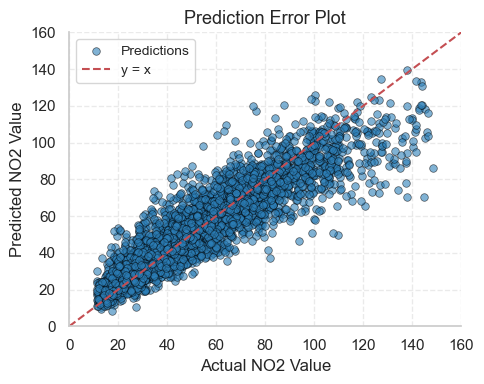

C:\Users\emin8\AppData\Local\Temp\ipykernel_29120\1337041859.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


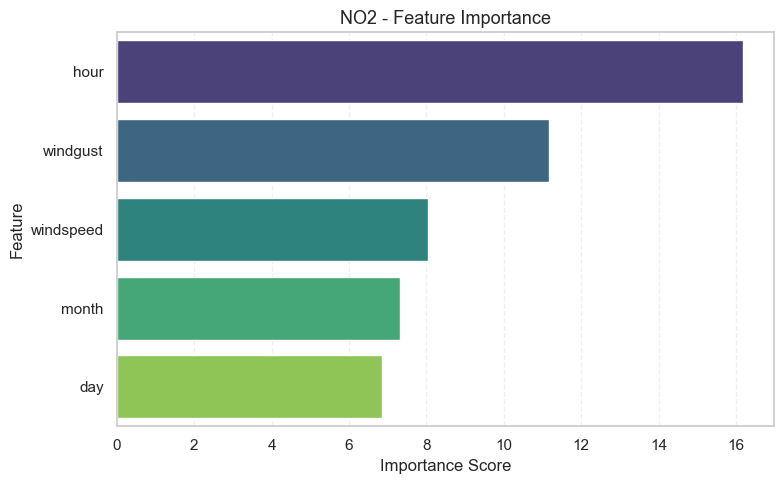

In [3]:
evaluate_catboost_no2(df)

In [3]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    median_absolute_error, mean_absolute_percentage_error,
    explained_variance_score, max_error, r2_score
)
import numpy as np
import pickle

def evaluate_catboost_no2(df, target='NO2'):
    selected_features = [
        'temp', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'is_weekend', 'is_nighttime', 'is_rush_hour'
    ]

    X = df[selected_features]
    y = df[target]

    # Train-test split (Hold-out değerlendirme için)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # CV için model parametreleri
    model_params = {
        'iterations': 800,
        'learning_rate': 0.15,
        'depth': 10,
        'l2_leaf_reg': 10,
        'verbose': 0,
        'random_state': 42
    }

    # Cross-validation (5-fold)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    results = {
        "mae_train": [], "mae_test": [],
        "rmse_train": [], "rmse_test": [],
        "r2_train": [], "r2_test": [],
        "mape": [], "medae": [], "evs": [], "maxerr": []
    }

    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = CatBoostRegressor(**model_params)
        model.fit(X_tr, y_tr)

        y_tr_pred = model.predict(X_tr)
        y_val_pred = model.predict(X_val)

        results["mae_train"].append(mean_absolute_error(y_tr, y_tr_pred))
        results["mae_test"].append(mean_absolute_error(y_val, y_val_pred))
        results["rmse_train"].append(np.sqrt(mean_squared_error(y_tr, y_tr_pred)))
        results["rmse_test"].append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
        results["r2_train"].append(r2_score(y_tr, y_tr_pred))
        results["r2_test"].append(r2_score(y_val, y_val_pred))
        results["mape"].append(mean_absolute_percentage_error(y_val, y_val_pred))
        results["medae"].append(median_absolute_error(y_val, y_val_pred))
        results["evs"].append(explained_variance_score(y_val, y_val_pred))
        results["maxerr"].append(max_error(y_val, y_val_pred))

    print("CatBoost (Optimize + CV) - NO2 Tahmini (5-Fold):")
    print(f"Train MAE (mean): {np.mean(results['mae_train']):.2f}")
    print(f"Test MAE  (mean): {np.mean(results['mae_test']):.2f}")
    print(f"Train RMSE (mean): {np.mean(results['rmse_train']):.2f}")
    print(f"Test RMSE  (mean): {np.mean(results['rmse_test']):.2f}")
    print(f"Train R² (mean): {np.mean(results['r2_train']):.4f}")
    print(f"Test R²  (mean): {np.mean(results['r2_test']):.4f}")
    print(f"Test MAPE (mean): {np.mean(results['mape']) * 100:.2f}%")
    print(f"Test Median AE (mean): {np.mean(results['medae']):.2f}")
    print(f"Explained Variance (mean): {np.mean(results['evs']):.4f}")
    print(f"Max Error (mean): {np.mean(results['maxerr']):.2f}")

    # Final hold-out set ile eğitim ve test
    final_model = CatBoostRegressor(**model_params)
    final_model.fit(X_train, y_train)
    final_test_pred = final_model.predict(X_test)
    final_mae = mean_absolute_error(y_test, final_test_pred)
    print(f"\nFinal Test MAE (Hold-out set): {final_mae:.2f}")




In [4]:
evaluate_catboost_no2(df)

CatBoost (Optimize + CV) - NO2 Tahmini (5-Fold):
Train MAE (mean): 2.99
Test MAE  (mean): 8.27
Train RMSE (mean): 4.05
Test RMSE  (mean): 11.85
Train R² (mean): 0.9760
Test R²  (mean): 0.7945
Test MAPE (mean): 17.55%
Test Median AE (mean): 5.70
Explained Variance (mean): 0.7946
Max Error (mean): 78.98

Final Test MAE (Hold-out set): 7.67
